In [57]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [58]:
# load the dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train=X_train/255
X_test=X_test/255

In [5]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 1)
X_test.shape (10000, 32, 32, 3)
y_test.shape (10000, 1)


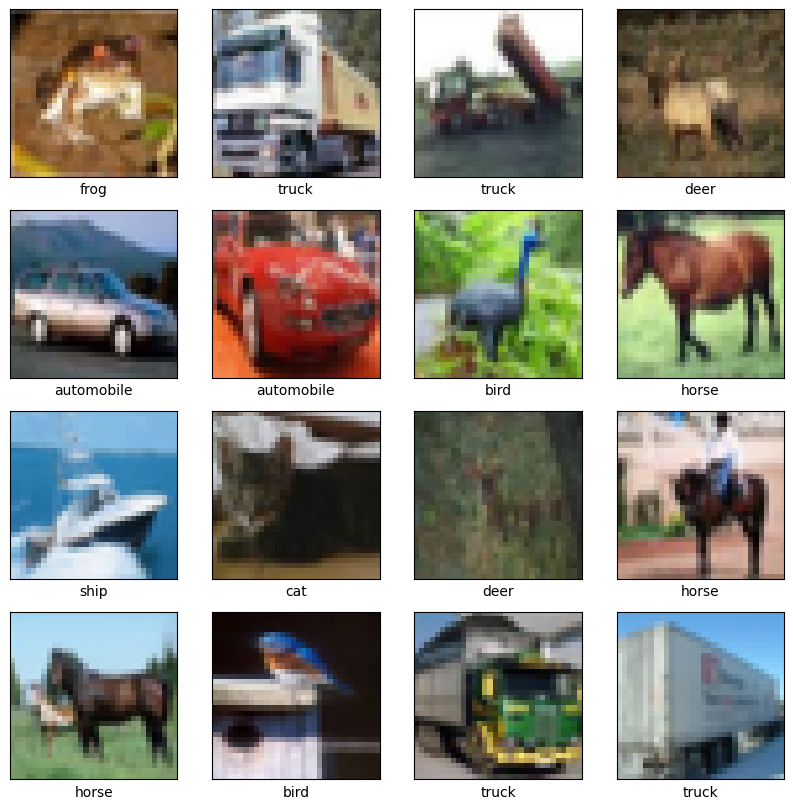

In [6]:
#Drawing Few images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [59]:
# now, let's define CNN based multi class classifier
model = models.Sequential()
model.add(layers.Input((32, 32, 3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu')) #, input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,149,002 (4.38 MB)

 Trainable params: 1,149,002 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
import time #To measure the execution time
start = time.time()

model.compile(optimizer=tf.keras.optimizers.Adam(), #SGD(learning_rate=0.1, momentum=0.1), #0.01
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #True),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_test, y_test))

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.2648 - loss: 1.9964 - val_accuracy: 0.4409 - val_loss: 1.5506
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.4597 - loss: 1.4993 - val_accuracy: 0.4994 - val_loss: 1.4234
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.5118 - loss: 1.3646 - val_accuracy: 0.5118 - val_loss: 1.3868
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.5540 - loss: 1.2473 - val_accuracy: 0.5836 - val_loss: 1.1728
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.6015 - loss: 1.1317 - val_accuracy: 0.5887 - val_loss: 1.1621
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.6201 - loss: 1.0752 - val_accuracy: 0.5771 - val_loss: 1.1924
Epoch 7/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - accuracy: 0.6397 - loss: 1.0208 - val_accuracy: 0.5593 - val_loss: 1.2997
Epoch 8/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.6493 - loss: 1.0151 - val_accuracy: 0

In [61]:
# now, let's define CNN based multi class classifier
model = models.Sequential()
model.add(layers.Input((32, 32, 3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu')) #, input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 510,154 (1.95 MB)

 Trainable params: 510,154 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
import time #To measure the execution time
start = time.time()

model.compile(optimizer=tf.keras.optimizers.Adam(), #SGD(learning_rate=0.1, momentum=0.1), #0.01
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #True),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - accuracy: 0.3233 - loss: 1.8131 - val_accuracy: 0.5303 - val_loss: 1.3184
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.5471 - loss: 1.2413 - val_accuracy: 0.6059 - val_loss: 1.1011
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.6243 - loss: 1.0531 - val_accuracy: 0.6506 - val_loss: 0.9826
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.6776 - loss: 0.9142 - val_accuracy: 0.6775 - val_loss: 0.9387
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.7219 - loss: 0.8005 - val_accuracy: 0.6963 - val_loss: 0.8820
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.7454 - loss: 0.7253 - val_accuracy: 0.7075 - val_loss: 0.8475
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.7695 - loss: 0.6529 - val_accuracy: 0.6907 - val_loss: 0.9023
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 104ms/step - accuracy: 0.7896 - loss: 0.5943 -

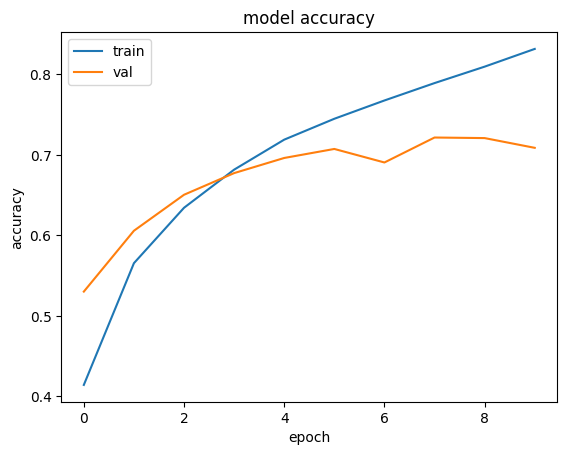

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [63]:
# now, let's define CNN based multi class classifier
model = models.Sequential()
model.add(layers.Input((32, 32, 3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu')) #, input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │    37,749,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,849,162 (144.38 MB)

 Trainable params: 37,849,162 (144.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import time #To measure the execution time
start = time.time()

model.compile(optimizer=tf.keras.optimizers.Adam(), #SGD(learning_rate=0.1, momentum=0.1), #0.01
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #True),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

end = time.time()
print("Execution time is", int(end - start), "seconds")

In [65]:
import numpy as np
def predict(model, data):
    probs = model.predict(data)
    label = np.argmax(probs, axis=1)
    return [class_names[_] for _ in label]


__let's test the model on some the test samples__

In [66]:
sample = np.random.permutation(len(X_test))[:16]
inputs = X_test[sample]
true_labels = y_test[sample]
labels = predict(model, inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


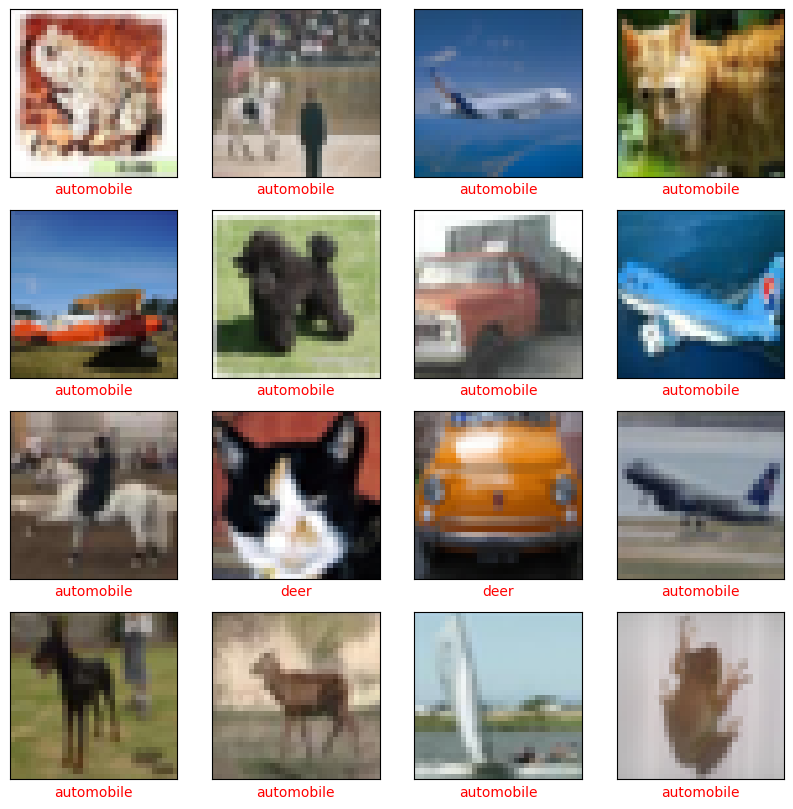

Accuracy: 0 %


In [67]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
t_correct = 0
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(inputs[i], cmap=plt.cm.binary)
    correctness = class_names[true_labels[i][0]] == labels[i]
    if correctness: t_correct += 1
    color = "green" if correctness else "red"
    name = f"{labels[i]}"
    plt.xlabel(name, color=color)
    plt.xticks([])
    plt.yticks([])
plt.show()
print("Accuracy:", int(100*t_correct/16), '%')

In [29]:
X_tr = X_train.reshape(X_train.shape[0], 32*32*3)
X_te = X_test.reshape(X_test.shape[0], 32*32*3)


model = models.Sequential()
model.add(layers.Input(((32*32,))))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 658,698 (2.51 MB)

 Trainable params: 658,698 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
X_train_mean_1 = X_train[:][:][:][0].mean()
X_train_mean_2 = X_train[:][:][:][1].mean()
X_train_mean_3 = X_train[:][:][:][2].mean()

In [20]:
net_mean = np.mean(X_train, axis=3)

In [23]:
net_mean.shape

(50000, 32, 32)

In [31]:
y_train.shape

(50000, 1)

In [ ]:
y_mean = np.mean(y_train, axis=0)

In [15]:
X_train_mean_1

np.float64(0.40567555147058826)

In [16]:
X_train_mean_2

np.float64(0.5111660028594772)

In [17]:
X_train_mean_3

np.float64(0.5244727839052287)

In [46]:
model =models.Sequential()
model.add(layers.Input(((32*32,))))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 658,698 (2.51 MB)

 Trainable params: 658,698 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
X_test_gs = X_test.mean(axis=3)

In [44]:
X_test_gs.shape

(10000, 32, 32)

In [45]:
X_test_gs = X_test_gs.reshape(X_test.shape[0], 32*32)

In [47]:
import time #To measure the execution time
start = time.time()

model.compile(optimizer=tf.keras.optimizers.Adam(), #SGD(learning_rate=0.1, momentum=0.1), #0.01
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #True),
              metrics=['accuracy'])
net_mean = net_mean.reshape(net_mean.shape[0], 32*32)
history = model.fit(net_mean, y_train, epochs=50, validation_data=(X_test_gs, y_test))
end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.2321 - loss: 2.1074 - val_accuracy: 0.3210 - val_loss: 1.8810
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3312 - loss: 1.8641 - val_accuracy: 0.3579 - val_loss: 1.8184
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.3648 - loss: 1.7829 - val_accuracy: 0.3542 - val_loss: 1.7804
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3855 - loss: 1.7248 - val_accuracy: 0.3954 - val_loss: 1.7010
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4075 - loss: 1.6667 - val_accuracy: 0.4040 - val_loss: 1.6866
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4152 - loss: 1.6426 - val_accuracy: 0.4075 - val_loss: 1.6542
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4257 - loss: 1.6075 - val_accuracy: 0.4143 - val_loss: 1.6455
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4392 - loss: 1

In [38]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [49]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [39]:
history.history['accuracy']

[0.3405799865722656,
 0.36796000599861145,
 0.385019987821579,
 0.4013400077819824,
 0.420960009098053,
 0.42802000045776367,
 0.4370799958705902,
 0.44648000597953796,
 0.45622000098228455,
 0.46226000785827637,
 0.47067999839782715,
 0.47863999009132385,
 0.488180011510849,
 0.49507999420166016,
 0.5046600103378296,
 0.5094599723815918,
 0.5136600136756897,
 0.5216599702835083,
 0.5284000039100647,
 0.5357599854469299,
 0.5453799962997437,
 0.5494599938392639,
 0.5567399859428406,
 0.5622599720954895,
 0.571940004825592,
 0.5785800218582153,
 0.587119996547699,
 0.5904600024223328,
 0.5998200178146362,
 0.6061199903488159,
 0.6140000224113464,
 0.621940016746521,
 0.6261199712753296,
 0.6376799941062927,
 0.6422600150108337,
 0.6513599753379822,
 0.6581599712371826,
 0.6664000153541565,
 0.6706799864768982,
 0.6789399981498718,
 0.6843799948692322,
 0.6946799755096436,
 0.6985399723052979,
 0.7047799825668335,
 0.7134199738502502,
 0.7210400104522705,
 0.7266600131988525,
 0.73052000

In [40]:
history.history['loss']

[1.83424973487854,
 1.7659553289413452,
 1.7131963968276978,
 1.672934889793396,
 1.6316689252853394,
 1.6070470809936523,
 1.5781238079071045,
 1.5540765523910522,
 1.5292847156524658,
 1.5023287534713745,
 1.4845463037490845,
 1.4571213722229004,
 1.4363011121749878,
 1.4193265438079834,
 1.3973257541656494,
 1.3815401792526245,
 1.366053581237793,
 1.3425832986831665,
 1.321355938911438,
 1.3039964437484741,
 1.2813849449157715,
 1.2670619487762451,
 1.2455105781555176,
 1.223587155342102,
 1.2062705755233765,
 1.1862620115280151,
 1.1678394079208374,
 1.1478544473648071,
 1.1266553401947021,
 1.1080797910690308,
 1.0848395824432373,
 1.0632147789001465,
 1.0462383031845093,
 1.0225625038146973,
 1.003913402557373,
 0.9824994802474976,
 0.9647064208984375,
 0.9432092905044556,
 0.9263510704040527,
 0.9058982133865356,
 0.8894067406654358,
 0.8680248260498047,
 0.8510856032371521,
 0.8290955424308777,
 0.8119360208511353,
 0.792173445224762,
 0.7741922736167908,
 0.7630172371864319,


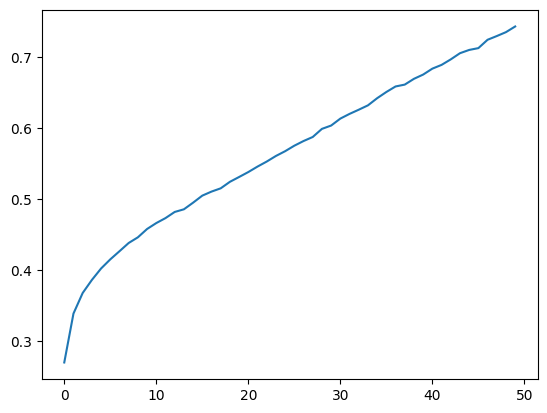

In [48]:
plt.plot(history.history['accuracy'], label='accuracy')

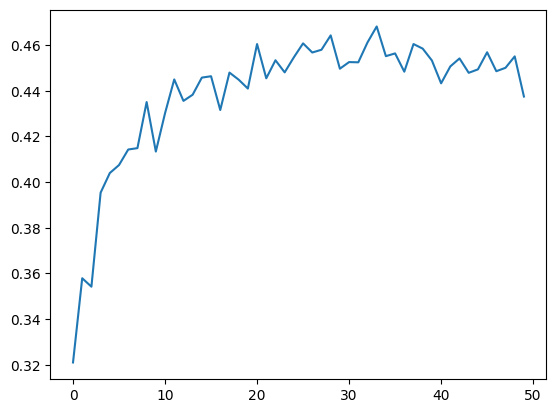

In [50]:
plt.plot(history.history['val_accuracy'], label='accuracy')

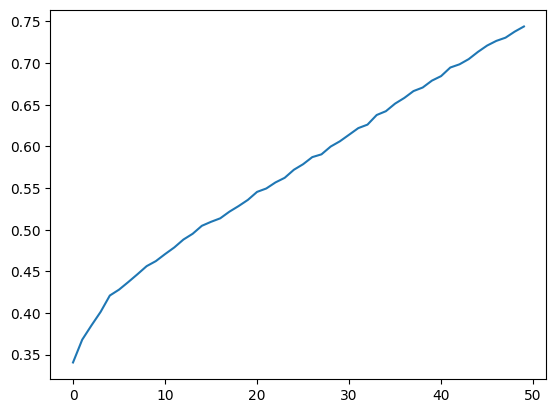

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')

In [51]:
X_train.shape

(50000, 32, 32, 3)

In [55]:
new_mean = np.mean(X_train[:][0:3][0:3][:])
print(new_mean)

0.48043811274509807


In [56]:
new_train = np.zeros((X_train.shape[0], 3, 3, 3))

In [ ]:
for i in range(X_train.shape[0]):
    new_mean = np.mean(X_train[:][0:3][0:3][:])

In [ ]:
new_train = np.zeros((X_train.shape[0], 3, 3, 3))
for i in range(32):
    new_train[:, 0, 0, :] = X_train[:, i//11, i%11, :]
    new_train[:, 1, 1, :] = X_train[:, i//11, i%11, :]
    new_train[:, 2, 2, :] = X_train[:, i//11, i%11, :]
    new_train[:, 3, 3, :] = X_train[:, i//11, i%11, :]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
